In [1]:
import scipy.io as scio
import math
import numpy as np
import matplotlib.pyplot as plt

dataMat = scio.loadmat('./dataset/1_data.mat')
x = dataMat['x']
t = dataMat['t']

In [6]:
def phi(x, m):
    X = []
    for i in range(m):
        # X += [sigmoid_basis(x,i, m)]
        X.append(sigmoid_basis(x,i, m))
    return np.asarray(X).reshape(-1, m)

def sigmoid_basis(x, j, m, sigma=0.1):
    muj = (2*j)/ m
    a = (x - muj)/ sigma
    return 1/ (1 + np.exp(-a))

M = 3

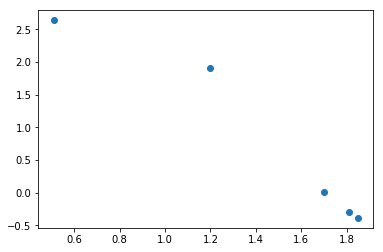

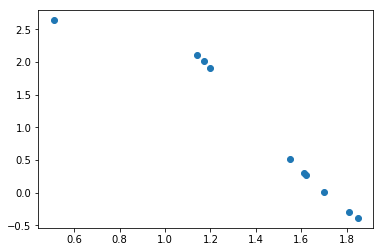

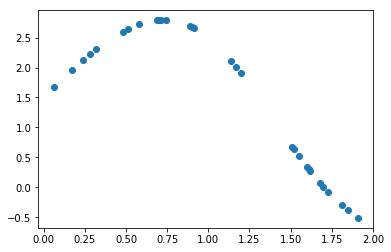

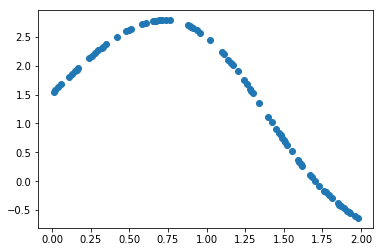

In [28]:
for n in [5,10,30,80]: #分別用不同的資料量測試
    plt.figure()
    plt.plot(x[:n],t[:n],'o') #劃上資料點

    PHI = phi(x[0], M)
    target = t[:n]
    for i in range(1,n):
        PHI = np.vstack((PHI, phi(x[i], M)))

In [12]:
s0_inv = (10**-6) * np.identity(M) #S0
m0 = 0
beta = 1

# 大PHI矩陣(裡面有許多小phi)
PHI =  phi(x[0], M)
sn_inv = s0_inv + beta*PHI.T.dot(PHI)
sn = np.linalg.inv(sn_inv)
mn = sn.dot(beta*np.dot(PHI.T, t[0]))
# todo: 每次多拿到一筆資料來更新M, S
for i in range(1, x.shape[0]):
    if i == 10:
        break
        
    # PHI = phi(x[:i], M)
    # todo: 這樣有考慮i以前的全部資料嗎?
    PHI = np.vstack((PHI, phi(x[i], M)))
    sn_inv = sn_inv + beta*PHI.T.dot(PHI) # 計算Sn，且beta = 1
    sn = np.linalg.inv(sn_inv)
    print(sn.shape, PHI.shape, t[:i+1].shape)
    mn = sn.dot((sn_inv.dot(mn)+beta*PHI.T.dot(t[:i+1])))

(3, 3) (2, 3) (2, 1)
(3, 3) (3, 3) (3, 1)
(3, 3) (4, 3) (4, 1)
(3, 3) (5, 3) (5, 1)
(3, 3) (6, 3) (6, 1)
(3, 3) (7, 3) (7, 1)
(3, 3) (8, 3) (8, 1)
(3, 3) (9, 3) (9, 1)
(3, 3) (10, 3) (10, 1)


In [11]:
print(phi(x[0], M).shape)

(1, 3)
(1, 1)


array([[2.63993126]])

In [19]:
b = phi(x[:3], 3)
# print(x[0])
print(b.shape)

(3, 3, 1)


In [ ]:
def gaussian_pdf(x, mean, sd):
    y = (1/(sd * math.sqrt(2*math.pi))) * (math.e ** ((x-mean)** 2)/2*sd**2)
    return y
